In [2]:
#參考資料 https://www.kaggle.com/outrunner/use-keras-to-count-sea-lions
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import skimage.feature
import keras
import pandas as pd
from IPython.display import display, display_html
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
r = 0.4     #scale down
width = 100 #patch size 

# loading training jpg and training dot jpg
  - training jpg: original jpg file <font color=red>without</font> lable (dot)
  - training dot jpg: original jpg file <font color=red>with</font> label (dot)

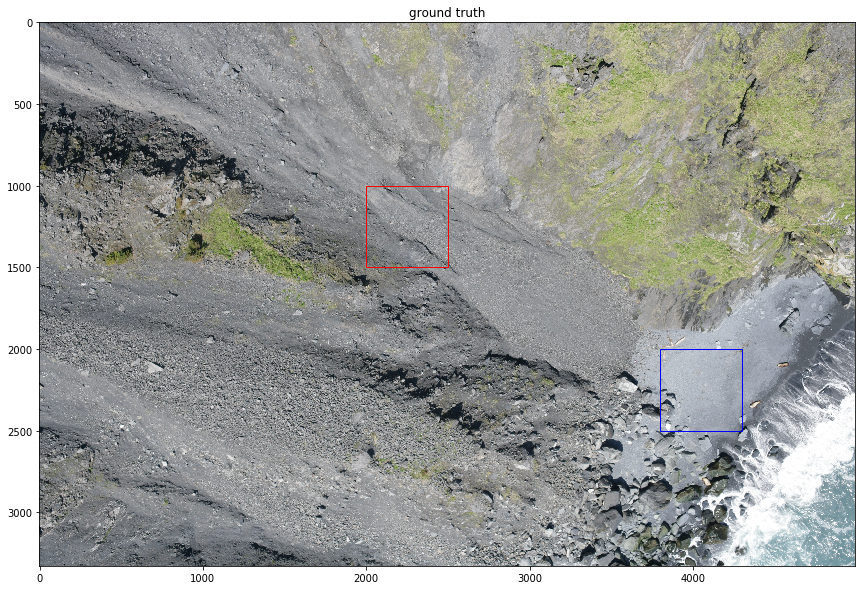

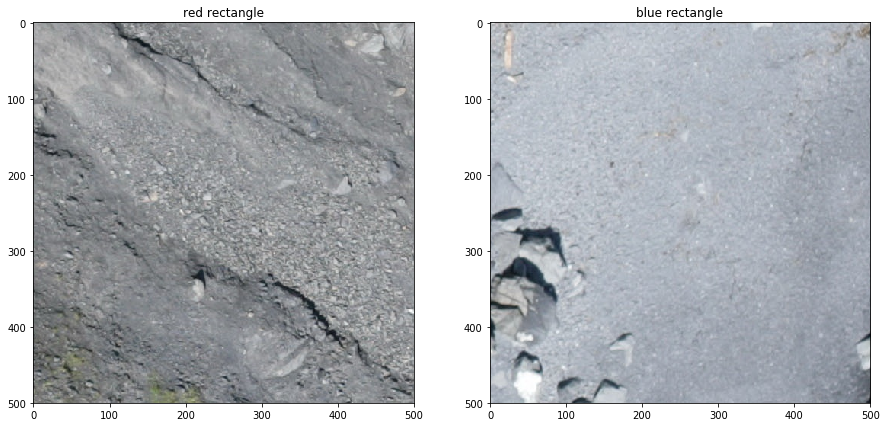

In [4]:
import matplotlib.patches as patches
filename = '314.jpg'
image_1 = cv2.imread("../corpus/KaggleNOAASeaLions/TrainDotted/" + filename)
image_2 = cv2.imread("../corpus/KaggleNOAASeaLions/Train/" + filename)    
img1 = cv2.GaussianBlur(image_1,(5,5),0)

xy_red   = [2000,1000,500]
xy_blue  = [3800,2000,500]

plt.figure(figsize=(15, 10))
ax = plt.subplot(1,1,1)
ax.set_title('ground truth')
#ax.imshow(image_2)
ax.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
rec_red  = patches.Rectangle((xy_red[0],xy_red[1]),xy_red[2],xy_red[2],linewidth=1,edgecolor='r',facecolor='none')
rec_blue = patches.Rectangle((xy_blue[0],xy_blue[1]),xy_blue[2],xy_blue[2],linewidth=1,edgecolor='b',facecolor='none')
ax.add_patch(rec_red)
ax.add_patch(rec_blue)

plt.figure(figsize=(15, 10))
ax = plt.subplot(1,2,1)
ax.set_title('red rectangle')
img_red = image_1[xy_red[1]:xy_red[1]+xy_red[2],xy_red[0]:xy_red[0]+xy_red[2],:]
ax.imshow(cv2.cvtColor(img_red,cv2.COLOR_BGR2RGB))

ax = plt.subplot(1,2,2)
ax.set_title('blue rectangle')
img_red = image_1[xy_blue[1]:xy_blue[1]+xy_blue[2],xy_blue[0]:xy_blue[0]+xy_blue[2],:]
ax.imshow(cv2.cvtColor(img_red,cv2.COLOR_BGR2RGB))


# label mark
  * <font color='red'>red</font>: adult males
  * <font color='magenta'>magenta</font>: subadult males
  * <font color='brown'>brown</font>: adult females
  * <font color='blue'>blue</font>: juveniles
  * <font color='green'>green</font>: pups

# dataset description
  
  
  <font size =3 >
  <table align="left" border="2" >
  <tr> <td></td>                                       <td><font size=3>number</font></td><td><font size=3>size</font></td></tr>
  <tr> <td><font size = 3>training data</font></td>    <td><font size=3>949   </font></td><td><font size=3>5.86GB</font></td></tr>
  <tr> <td><font size = 3>training data dot</font></td><td><font size=3>948   </font></td><td><font size=3>3.95GB</font></td></tr>
  <tr> <td><font size = 3>testing data</font></td>     <td><font size=3>18636 </font></td><td><font size=3>86GB</font></td></tr>
  </table>
  </font>

# Data preprocess
## image_1: training data w/ label<br>image_2: training data w/o label<br>image_3: cv2_absdiff(image_1,image_2)<br>image_4: cv2_bitwise_or(image_3,image_3)

In [5]:
#def GetData(filename):
# absolute difference between Train and Train Dotted
image_3 = cv2.absdiff(image_1,image_2)
mask_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
mask_1[mask_1 < 50] = 0
mask_1[mask_1 > 0] = 255
image_4 = cv2.bitwise_or(image_3, image_3, mask=mask_1)
# convert to grayscale to be accepted by skimage.feature.blob_log
image_6 = np.max(image_4,axis=2)
np.sqrt((image_3**2).mean())

3.9898581334179637

## subplot method 1

In [ ]:
plt.figure(figsize=(15, 10))
ax = plt.subplot(2,2,1); ax.imshow(cv2.cvtColor(image_1,cv2.COLOR_BGR2RGB)); ax.set_title('image1: TrainDotted')
ax = plt.subplot(2,2,2); ax.imshow(cv2.cvtColor(image_2,cv2.COLOR_BGR2RGB)); ax.set_title('image2: Train')
ax = plt.subplot(2,2,3); ax.imshow(cv2.cvtColor(image_3,cv2.COLOR_BGR2RGB)); ax.set_title('image3: abs diff on image1,image2')
ax = plt.subplot(2,2,4); ax.imshow(image_4); ax.set_title('image4: bit_wise_of on image3,image3,mask1')

## subplot method 2

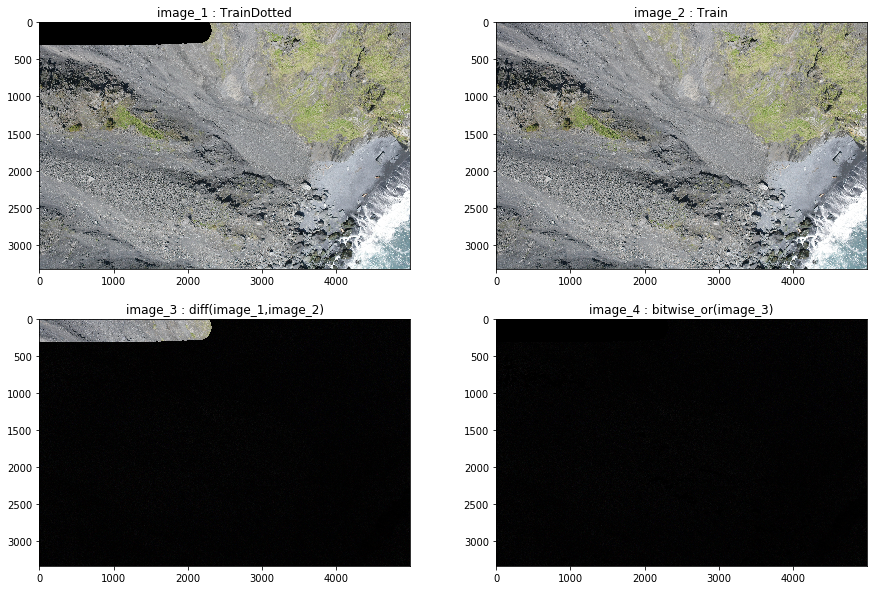

In [6]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0][0].imshow(image_1[:,:,[2,1,0]]); ax[0][0].title.set_text('image_1 : TrainDotted')
ax[0][1].imshow(image_2[:,:,[2,1,0]]); ax[0][1].title.set_text('image_2 : Train')
ax[1][0].imshow(image_3[:,:,[2,1,0]]); ax[1][0].title.set_text('image_3 : diff(image_1,image_2)')
ax[1][1].imshow(image_4[:,:,[2,1,0]]); ax[1][1].title.set_text('image_4 : bitwise_or(image_3)')

# zoom in to get img1zoom,img2zoom
##  image3 = cv2.absdiff(image1,image2) <br>image3 = cv2.absdiff(ima1zoom,img2zoom)

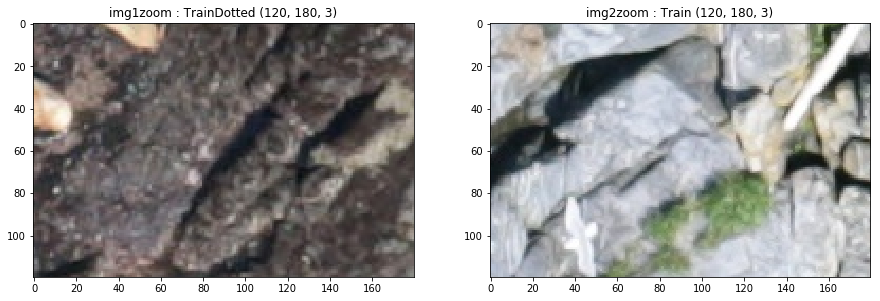

In [12]:
xy_rate = image_1.shape[1]/image_1.shape[0]  # img.shape[0] y長度
recx, recy, width, high = [1920,1830,int(120*xy_rate),120]
row, col = np.indices((high,width))
img1zoom = image_1[recy+row,recx+col,:]
img2zoom = image_2[recy+row,recx+col,:]
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,10))
ax0.imshow(img1zoom[:,:,[2,1,0]]); ax0.title.set_text('img1zoom : TrainDotted ' + str(img1zoom.shape))
ax1.imshow(img2zoom[:,:,[2,1,0]]); ax1.title.set_text('img2zoom : Train ' + str(img2zoom.shape))



## direclty diff(imag1,image2)

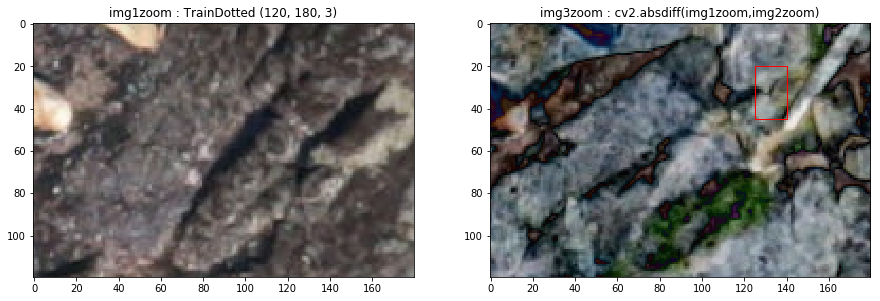

In [13]:
img3zoom = cv2.absdiff(img1zoom,img2zoom)
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,10))
ax0.imshow(img1zoom[:,:,[2,1,0]]); ax0.title.set_text('img1zoom : TrainDotted ' + str(img1zoom.shape))
ax1.imshow(img3zoom[:,:,[2,1,0]]); ax1.title.set_text('img3zoom : cv2.absdiff(img1zoom,img2zoom)')

#recx, recy, width, high = [44,5,15,25]
recx, recy, width, high = [125,20,15,25]
rect = patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='r',facecolor='none')
ax1.add_patch(rect)

### 從點陣圖可以知道即便不是label的位置，相減的結果也不會是0，頂多是逼近0而已<br> 所以後處理(img3-->img4)不僅僅是為了處理原始圖中被黑掉的部份，還要處理相減不為0的狀況

In [14]:
print('img3zoom shape is '+str(img3zoom.shape))
print('img3zoom[:,:,0] => red rectangle part raw data')
print('\n we can find that the value in black part is not actuly equal to 0')
#print(img3zoom[recy:recy+high,recx:recx+width,0])

row, col = np.indices((20,20))
df = pd.DataFrame(img3zoom[recy+row,recx+col,0], index=col[0])
display(df)

img3zoom shape is (120, 180, 3)
img3zoom[:,:,0] => red rectangle part raw data

 we can find that the value in black part is not actuly equal to 0


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   117  117  114  105  103  109  112  126  130  127  119  123  123  130  140   
1   122  131  133  128  122  118  121  134  137  135  128  128  133  132  137   
2   123  137  142  146  147  145  136  137  136  139  141  139  134  133  132   
3   129  150  157  160  167  168  150  146  143  146  151  147  146  134  123   
4   138  166  177  179  175  166  148  153  157  157  155  151  139  127  111   
5   143  173  184  179  180  169  148  148  150  146  138  137  122  101   85   
6   154  173  182  183  171  159  147  133  122  114  104   88   93   90   89   
7   151  167  166  169  172  156  145  141  113   87   63   86   94   89   79   
8   144  155  151  148  146  145  144  131  104   72   82  101   96   80   70   
9   110  130  144  140  147  145  139  112   62   74   83  103   88   76   70   
10   47   69   98  115  130  141  130   77   40   84   92   84   72   70   70   
11    7   11   31   71  119  140  123   38   44   95  103   77   60   60   63   
12   16   16   32   61  105  140   92   35   75  104  105   93   78   72   79   
13   18   47   79   94   97   85   73   53   93  116  110  104  106  106  110   
14   52   89  125  131  143  146  130   78  102  107  100   95  105  109  119   
15   93  119  135  152  162  170  156  111  103   96   90  112  114  111  109   
16  119  133  147  161  169  176  157  122  105   93   89   95  104  101   99   
17  136  149  154  166  170  164  144  128  113  111  110  110  107  102  100   
18  151  159  175  175  171  159  149  143  132  124  124  111  108  107   94   
19  175  173  172  172  172  164  161  164  155  136  122  108   85   62   48   

     15   16   17   18   19  
0   138  142  151  152  145  
1   134  132  130  133  130  
2   112  107  113  111  102  
3   106   93   93  103   96  
4    97   87   93   94   95  
5    88   83   88   88   74  
6    72   61   62   64   47  
7    62   55   50   52   54  
8    63   56   44   55   76  
9    71   65   56   66   93  
10   75   77   74   78   98  
11   72   82   88   96  104  
12   92   92  100  111   99  
13  118  107  103  108   75  
14  121  123  123   96   56  
15  111  118  107   81   57  
16   91   89   82   58   89  
17   94   79   51   51  117  
18   85   65   42   92  127  
19   31   42   73  124  136

# image4: post process (bitwise_or by mask) for image3
> mask_1 = cv2.cvtColor(img1zoom, cv2.COLOR_BGR2GRAY)<br>
> mask_1[mask_1 < 50] = 0 <br>
> mask_1[mask_1 >  0] = 255

## 把image1圖片經過灰階處理後,這個階段看不出特別的地方, 

> mask_1   = gary(img1zoom) <br>
> img3zoom = absdiff(img1zoom,img2zoom) <br>
> img4zoom = bit_wise_or(img3zoom,img3zoom, mask1)

## 但是如果image1是包含黑色塊狀就有差異

### 而且如果從畫面上看img3zoom, img4zoom沒有不同，但是從點陣圖就有很大的差異





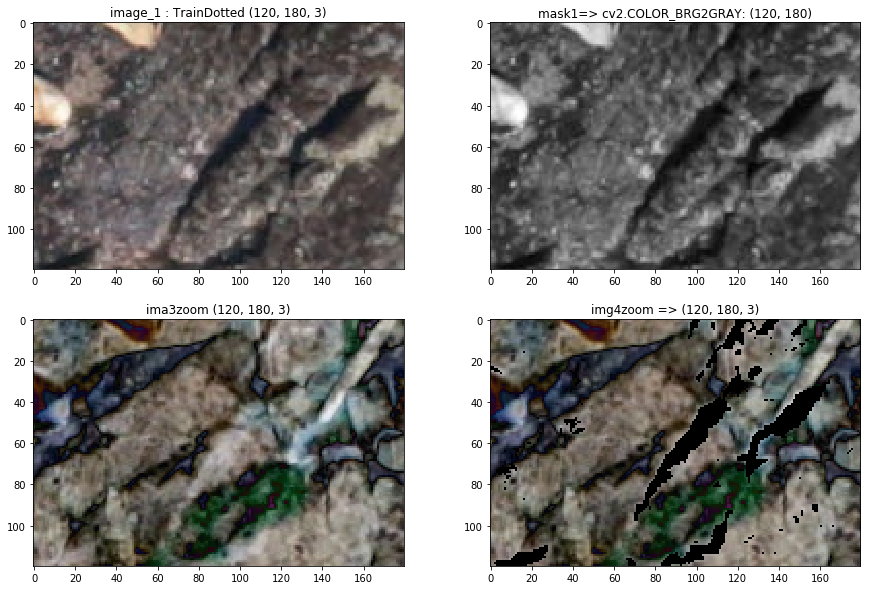

In [15]:
mask_1 = cv2.cvtColor(img1zoom, cv2.COLOR_BGR2GRAY)
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0][0].imshow(img1zoom[:,:,[2,1,0]]); ax[0][0].title.set_text('image_1 : TrainDotted ' + str(img1zoom.shape))
ax[0][1].imshow(mask_1,cmap='gray'); ax[0][1].title.set_text('mask1=> cv2.COLOR_BRG2GRAY: ' + str(mask_1.shape))

mask_1[mask_1 < 50] = 0
mask_1[mask_1 > 0] = 255

img4zoom = cv2.bitwise_or(img3zoom, img3zoom, mask=mask_1)
ax[1][0].imshow(img3zoom); ax[1][0].title.set_text('ima3zoom ' + str(img3zoom.shape))
ax[1][1].imshow(img4zoom); ax[1][1].title.set_text('img4zoom => ' + str(img4zoom.shape))


## 如果處理的圖片image_1(ground truth with label)包含黑色區塊看得出來差異
## comparison between img3zoom, img4zoom


> **mask_1**   = gary(img1zoom) <br>
> **mask_1**[**mask_1** < 50] = 0 <br>
> **mask_1**[**mask_1** > 0] = 255

> <font color=blue>**img3zoom**</font> = cv.absdiff(<font color=brown>**img1zoom**</font>,<font color=green>**img2zoom**</font>) <br>
> img4zoom = cv.bitwise_or(<font color=blue>**img3zoom**,**img3zoom**</font>,mask=**mask_1**)

## 取出包含黑色區塊的ground truth影像(img1zome)

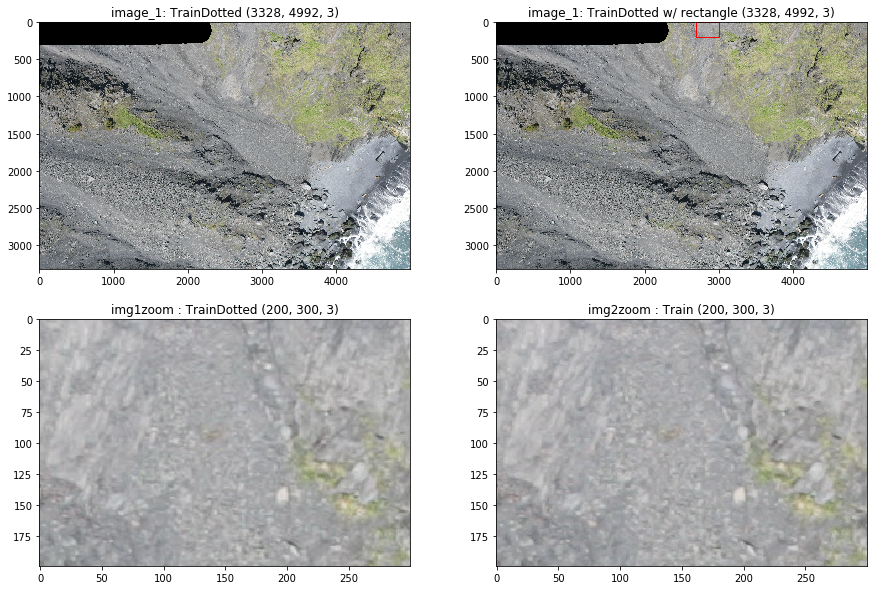

In [7]:
xy_rate = image_1.shape[1]/image_1.shape[0]  # img.shape[0] y長度
recx, recy, width, high = [2700,0,int(200*xy_rate),200]
row, col = np.indices((high,width))
img1zoom = image_1[recy+row,recx+col,:]
img2zoom = image_2[recy+row,recx+col,:]
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0][0].imshow(image_1[:,:,[2,1,0]]);  ax[0][0].title.set_text('image_1: TrainDotted ' + str(image_1.shape))
ax[0][1].imshow(image_1[:,:,[2,1,0]]);  ax[0][1].title.set_text('image_1: TrainDotted w/ rectangle ' + str(image_1.shape))
ax[1][0].imshow(img1zoom[:,:,[2,1,0]]); ax[1][0].title.set_text('img1zoom : TrainDotted ' + str(img1zoom.shape))
ax[1][1].imshow(img2zoom[:,:,[2,1,0]]); ax[1][1].title.set_text('img2zoom : Train ' + str(img2zoom.shape))

rect = patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='r',facecolor='none')
ax[0][1].add_patch(rect)

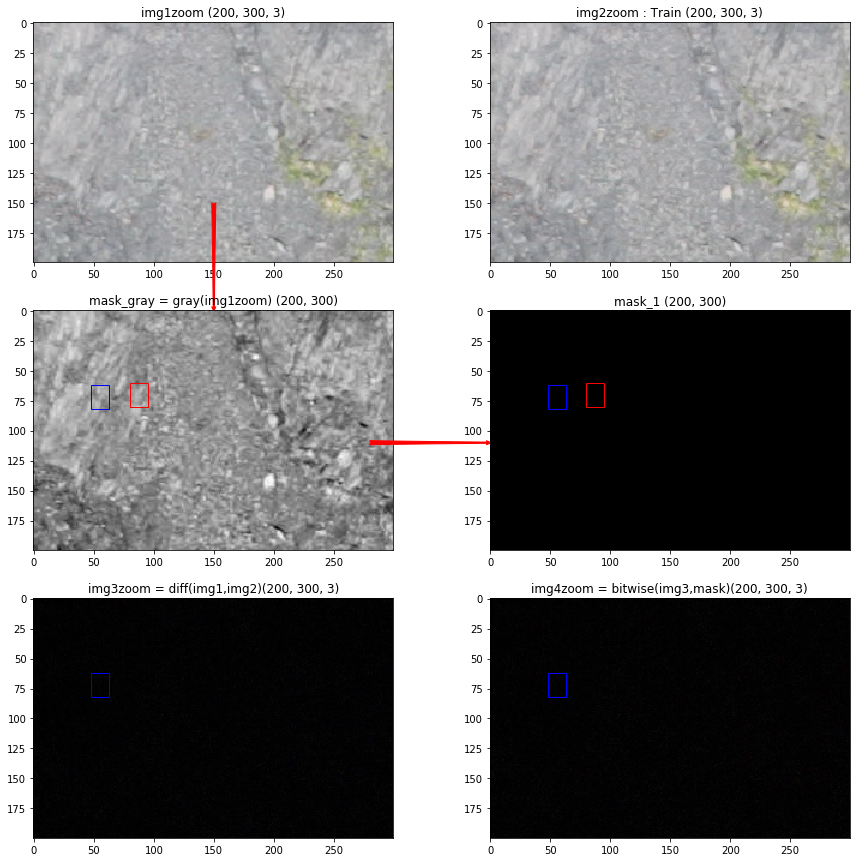

In [8]:
from copy import deepcopy
from matplotlib.patches import ConnectionPatch

img3zoom = cv2.absdiff(img1zoom,img2zoom)
mask_1 = cv2.cvtColor(img1zoom, cv2.COLOR_BGR2GRAY)
mask_gray = deepcopy(mask_1)
mask_1[mask_1 < 50] = 0
mask_1[mask_1 > 0] = 255
img4zoom = cv2.bitwise_or(img3zoom, img3zoom, mask=mask_1)

fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0][0].imshow(img1zoom[:,:,[2,1,0]],zorder=0); ax[0][0].title.set_text('img1zoom ' + str(img1zoom.shape))
ax[0][1].imshow(img2zoom[:,:,[2,1,0]],zorder=0); ax[0][1].title.set_text('img2zoom : Train ' + str(img2zoom.shape))
ax[1][0].imshow(mask_gray,cmap='gray',zorder=0); ax[1][0].title.set_text('mask_gray = gray(img1zoom) ' + str(mask_gray.shape))
ax[1][1].imshow(mask_1,cmap='gray',zorder=0);    ax[1][1].title.set_text('mask_1 ' + str(mask_1.shape))
ax[2][0].imshow(img3zoom[:,:,[2,1,0]],zorder=0); ax[2][0].title.set_text('img3zoom = diff(img1,img2)' + str(img3zoom.shape))
ax[2][1].imshow(img4zoom,zorder=0);              ax[2][1].title.set_text('img4zoom = bitwise(img3,mask)' + str(img4zoom.shape))
#recx, recy, width, high = np.array([80,60,10,20],dtype='int')
recx, recy, width, high = [80,60,15,20]
rect1= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='r',facecolor='none')
rect2= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='r',facecolor='none')
ax[1][0].add_patch(rect1)
ax[1][1].add_patch(rect2)

recx, recy, width, high = [48,62,15,20]
rect3= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='b',facecolor='none')
rect4= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='b',facecolor='none')
rect5= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='b',facecolor='none')
rect6= patches.Rectangle((recx,recy),width,high,linewidth=1,edgecolor='b',facecolor='none')
ax[1][0].add_patch(rect3)
ax[1][1].add_patch(rect4)
ax[2][0].add_patch(rect5)
ax[2][1].add_patch(rect6)


con = ConnectionPatch(xyA=[150,150], xyB=[150,0], coordsA="data",coordsB="data",axesA=ax[0][0], axesB=ax[1][0], color="red",arrowstyle="fancy",zorder=20)
ax[0][0].add_artist(con)
con2 = ConnectionPatch(xyA=[280,110], xyB=[0,110], coordsA="data",coordsB="data",axesA=ax[1][0], axesB=ax[1][1], color="red",arrowstyle="fancy",zorder=20)
ax[1][0].add_artist(con2)


# how mask_1 work
## 顯示藍色區塊的灰階圖形
- gary(image_1)
- gary(image_1) < 50 = 0, gary(image_1) > 0 =255

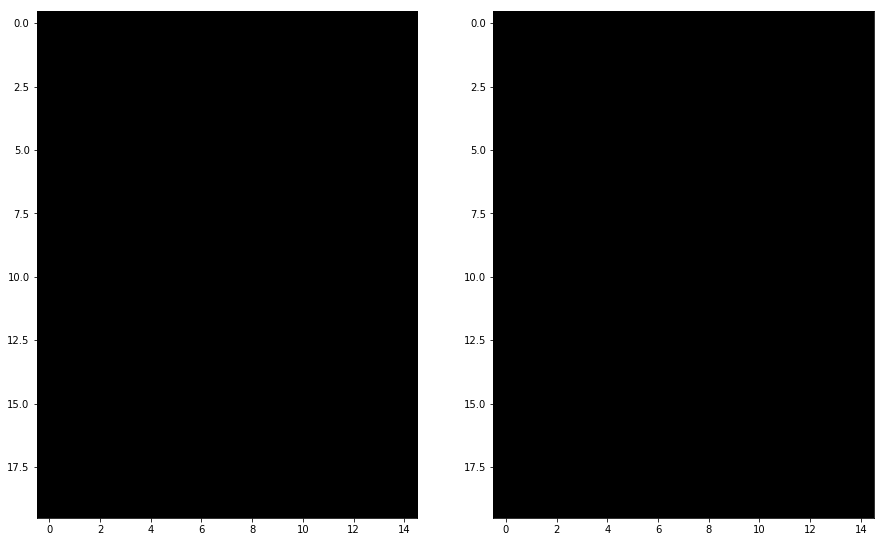

In [18]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(15,15))
row, col = np.indices((20,15))
ax0.imshow(mask_gray[recy+row,recx+col],cmap='gray'); #ax0.title.set_text('mask_gray ' + str(mask_gray.shape))
ax1.imshow(mask_1[recy+row,recx+col],cmap='gray');    #ax1.title.set_text('mask_1 :  ' + str(mask_1.shape))



## value between gary(image_1) and final mask_1

In [19]:
print(mask_gray.shape)
high=13;width=13
print('high='+str(high)+'\twidth='+str(width))


row, col = np.indices((high,width))
df1 = pd.DataFrame(mask_gray[recy+row,recx+col], index=col[0])
df2 = pd.DataFrame(mask_1[recy+row,recx+col], index=col[0])

html_str = df1.to_html() + df2.to_html()
display_html(html_str.replace('table','table style="display:inline"'),raw=True)



(200, 300)
high=13	width=13


0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 
 
 
 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 8 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 10 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 12 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 
 
 
 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 6 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 7 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 8 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 9 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 10 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 11 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 12 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0

# detail raw data for blue rectangle on img3zoom

(200, 300, 3)


0    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
0   125  121  124  132  134  140  139  139  144  147  145  143  143  143  146   
1   105  102  109  122  125  135  139  140  142  143  147  153  148  146  146   
2    97   97  100  112  120  131  139  137  139  139  146  146  146  149  149   
3   100  113  106  102  114  119  122  131  137  142  143  142  145  146  144   
4   100  109  101   98   96  103  113  123  132  136  139  141  138  137  141   
5    72   88   93   96   94  103  112  108    1    7    4    1    4    2    4   
6    65   79   83   89    7    4    3    3    2    3    2    3    0    5    6   
7    69   77    6    0    6    9    9    1    5    4    2    7    7    4    1   
8    68    3    7    3    0    3    5    4    3    9    2    1    3    2    5   
9     5    3    0    4    5    3    3    5   11    5    4    0    0    3    1   
10    2    2    5    0    0    4    0    1    2    5    2    1    0    3    3   
11    3    0    1    5    5    7    1    0    5    1    0    6    5    2    5   
12    2    2    3    5    3    4    5    1    5    2    0    2    4    3    3   
13    1    2    1    2    3    1    7    2    4    2    4    1    6    5    2   
14    2    3    2    5    7    7   13   16   18   11    2    2    6    6    0   
15    3    6    1    1    2   22   32   38   44   38   16   10    2    6    9   
16    0    4    1   10   20   42   50   56   68   64   38   19    0    1    2   
17    0    2    3   11   34   55   62   64   81   81   51   22   14    0   12   
18    7    9    1   19   43   68   67   67   77   83   72   31   20    3    1   
19    1    5    3   18   34   64   77   82   88   79   64   30   11    0    3   

     15   16   17   18   19  
0   149  151  155  160  162  
1   147  147  150  155  158  
2   147  148  150  154  156  
3   143  149  151  148    2  
4     2    5    9    2    2  
5     3    1    4    1    5  
6     9    3    2    8    5  
7     2    3    5    2    5  
8     4    2    0    1    5  
9     0    3    6    4    1  
10    0    0    2    2    0  
11    1    4    5    1    3  
12    0    2    2    2    1  
13    5    1    5    3    2  
14    4    2    2    3    0  
15    4    3    4    1    5  
16    1    3    5    0    4  
17   13    5    1    3    1  
18    0    4    1    1    3  
19    1    1    1    1    2

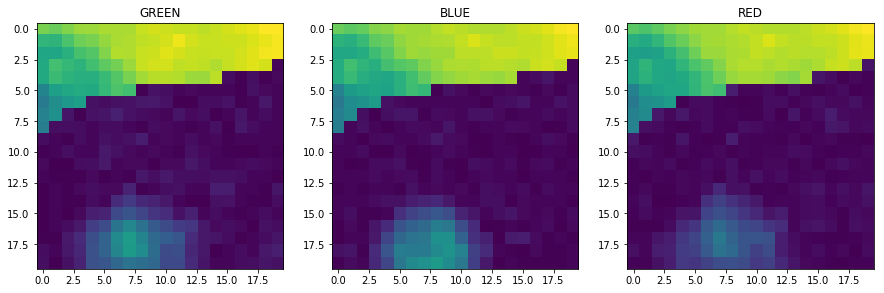

In [45]:
print(img3zoom.shape)
row, col = np.indices((20,20))

fig, (ax) = plt.subplots(1,3,figsize=(15,15))
#ax.set_title('ground truth')
#ax.imshow(img3zoom[recy+row,recx+col][:,:,[2,1,0]])
ax[0].imshow(img3zoom[recy+row,recx+col][:,:,0]);ax[0].title.set_text('GREEN')
ax[1].imshow(img3zoom[recy+row,recx+col][:,:,1]);ax[1].title.set_text('BLUE')
ax[2].imshow(img3zoom[recy+row,recx+col][:,:,2]);ax[2].title.set_text('RED')


RGBmap = {'B':0, 'G':1, 'R':2}
df = pd.DataFrame(img3zoom[recy+row,recx+col,RGBmap['G']], index=col[0])
display(df)


## img4zoom = cv2.bitwise_or(img3zoom, img3zoom, mask=mask_1)

(200, 300, 3)


0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  \
0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
19   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

    18  19  
0    0   0  
1    0   0  
2    0   0  
3    0   0  
4    0   0  
5    0   0  
6    0   0  
7    0   0  
8    0   0  
9    0   0  
10   0   0  
11   0   0  
12   0   0  
13   0   0  
14   0   0  
15   0   0  
16   0   0  
17   0   0  
18   0   0  
19   0   0

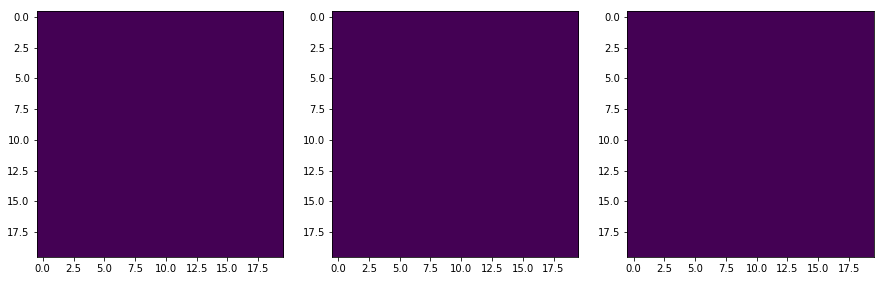

In [20]:
print(img4zoom.shape)
row, col = np.indices((20,20))

fig, (ax) = plt.subplots(1,3,figsize=(15,15))
ax[0].imshow(img4zoom[recy+row,recx+col,0])
ax[1].imshow(img4zoom[recy+row,recx+col,1])
ax[2].imshow(img4zoom[recy+row,recx+col,2])

RGBmap = {'B':0, 'G':1, 'R':2}
df = pd.DataFrame(img4zoom[recy+row,recx+col,RGBmap['B']], index=col[0])
display(df)


In [56]:
from IPython.display import display, display_html
import pandas as pd

#def color_negative_red(val):
#    color = 'red' if val > 0 and val <11 else 'black'
#    return 'color: %s' % color

row, col = np.indices((13,13))
dfimg3 = pd.DataFrame(img3zoom[recy+row,recx+col,0], index=col[0])
dfimg4 = pd.DataFrame(img4zoom[recy+row,recx+col,0], index=col[0])

#dfimg3 = dfimg3.style.applymap(color_negative_red)
#display(dfimg3)

html_str = dfimg3.to_html() + dfimg4.to_html()
display_html(html_str.replace('table','table style="display:inline"'),raw=True)


0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 
 
 
 
 0 
 126 
 122 
 128 
 134 
 135 
 138 
 138 
 138 
 145 
 148 
 146 
 144 
 144 
 
 
 1 
 104 
 103 
 113 
 123 
 126 
 133 
 138 
 139 
 143 
 144 
 148 
 154 
 147 
 
 
 2 
 93 
 93 
 100 
 112 
 116 
 128 
 140 
 139 
 145 
 146 
 150 
 148 
 145 
 
 
 3 
 96 
 111 
 105 
 102 
 110 
 119 
 125 
 134 
 145 
 147 
 147 
 143 
 144 
 
 
 4 
 96 
 108 
 102 
 99 
 99 
 107 
 116 
 126 
 136 
 141 
 141 
 140 
 134 
 
 
 5 
 71 
 89 
 94 
 97 
 96 
 105 
 114 
 110 
 1 
 8 
 6 
 3 
 4 
 
 
 6 
 65 
 78 
 84 
 89 
 7 
 5 
 7 
 8 
 10 
 11 
 8 
 0 
 0 
 
 
 7 
 70 
 79 
 9 
 1 
 8 
 9 
 14 
 8 
 5 
 4 
 3 
 9 
 4 
 
 
 8 
 67 
 6 
 6 
 5 
 2 
 5 
 5 
 3 
 1 
 5 
 4 
 2 
 1 
 
 
 9 
 5 
 2 
 1 
 5 
 3 
 7 
 5 
 7 
 12 
 3 
 4 
 2 
 5 
 
 
 10 
 1 
 2 
 6 
 2 
 2 
 11 
 7 
 4 
 3 
 4 
 2 
 1 
 7 
 
 
 11 
 4 
 0 
 0 
 5 
 6 
 11 
 3 
 4 
 4 
 0 
 4 
 4 
 10 
 
 
 12 
 2 
 1 
 1 
 1 
 4 
 1 
 2 
 1 
 10 
 6 
 11 
 6 
 6 
 
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 10 
 11 
 12 
 
 
 
 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 1 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 2 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 3 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 4 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 
 
 5 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 0 
 1 
 8 
 6 
 3 
 4 
 
 
 6 
 0 
 0 
 0 
 0 
 7 
 5 
 7 
 8 
 10 
 11 
 8 
 0 
 0 
 
 
 7 
 0 
 0 
 9 
 1 
 8 
 9 
 14 
 8 
 5 
 4 
 3 
 9 
 4 
 
 
 8 
 0 
 6 
 6 
 5 
 2 
 5 
 5 
 3 
 1 
 5 
 4 
 2 
 1 
 
 
 9 
 5 
 2 
 1 
 5 
 3 
 7 
 5 
 7 
 12 
 3 
 4 
 2 
 5 
 
 
 10 
 1 
 2 
 6 
 2 
 2 
 11 
 7 
 4 
 3 
 4 
 2 
 1 
 7 
 
 
 11 
 4 
 0 
 0 
 5 
 6 
 11 
 3 
 4 
 4 
 0 
 4 
 4 
 10 
 
 
 12 
 2 
 1 
 1 
 1 
 4 
 1 
 2 
 1 
 10 
 6 
 11 
 6 
 6

# what is image_6
## image_6 = np.max(image_4,axis=2)

In [9]:
image_6 = np.max(image_4,axis=2)
print(image_6.shape)

img6zoom = np.max(img4zoom,axis=2)
print(img6zoom.shape)
print(img6zoom)

(3328, 4992)
(200, 300)
[[ 3  5  5 ...,  3  1  0]
 [ 3  2  3 ...,  1  2  1]
 [ 3  1  2 ...,  5  4  3]
 ..., 
 [ 4  2  8 ...,  4  1  2]
 [ 6  4  6 ...,  6  1  4]
 [ 3  2  9 ...,  4 10  5]]


In [39]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse(image_1,image_2)
np.sqrt((image_3**2).mean())

5.9897443624262214

In [10]:
r = 0.4     #scale down
width = 100 #patch size 
# detect blobs
blobs = skimage.feature.blob_log(image_6, min_sigma=3, max_sigma=7, num_sigma=1, threshold=0.05)
h,w,d = image_2.shape
res=np.zeros((int((w*r)//width)+1,int((h*r)//width)+1,5), dtype='int16')

# detect blobs
blobszoom = skimage.feature.blob_log(img6zoom, min_sigma=3, max_sigma=7, num_sigma=1, threshold=0.05)
h,w,d     = image_2.shape # use image_2 rather than img2zoom
reszoom   = np.zeros((int((w*r)//width)+1,int((h*r)//width)+1,5), dtype='int16')

## blob_log
### Finds blobs in the given grayscale image.
- min_sigma=3, The minimum standard deviation for Gaussian Kernel. Keep this low to detect smaller blobs.
- max_sigma=7, The maximum standard deviation for Gaussian Kernel. Keep this high to detect larger blobs.
- num_sigma=1, The number of intermediate values of standard deviations to consider between min_sigma and max_sigma.
- threshold=0.05, The absolute lower bound for scale space maxima. Local maxima smaller than thresh are ignored. Reduce this to detect blobs with less intensities.
- <font color=gray>overlap : A value between 0 and 1. If the area of two blobs overlaps by a fraction greater than threshold, the smaller blob is eliminated.</font>

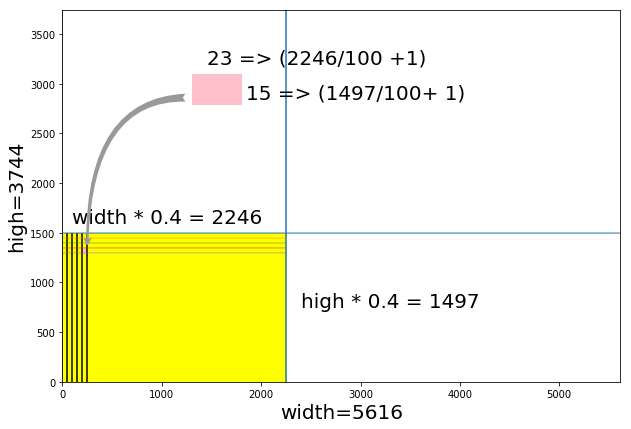

In [11]:
from matplotlib.patches import Ellipse

img_high  = 3744
img_width = 5616
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim([0, img_width])
ax.set_ylim([0, img_high])

ax.plot(np.array([int(3744*0.4)]*5616), linewidth=1)
ax.axvline(int(img_width*0.4))
rec = patches.Rectangle((0, 0), (img_width*0.4), (img_high*0.4), color='yellow')
ax.add_patch(rec)

t = [50,100,150,200,250]
v = [1500,1500,1500,1500,1500]
ax.vlines(t, [0], v)
ax.axvline()

step=-50
ax.plot(np.array([int(img_high*0.4+step  )]*(int(img_width*0.4))), linewidth=0.5)
ax.plot(np.array([int(img_high*0.4+step*2)]*(int(img_width*0.4))), linewidth=0.5)
ax.plot(np.array([int(img_high*0.4+step*3)]*(int(img_width*0.4))), linewidth=0.5)
ax.plot(np.array([int(img_high*0.4+step*4)]*(int(img_width*0.4))), linewidth=0.5)
plt.xlabel('width='+str(img_width),fontsize='20')
plt.ylabel('high='+str(img_high),fontsize='20')
ax.text(2400,  750, 'high * 0.4 = '  + str(int(img_high*0.4)),  fontsize=20)
ax.text( 100, 1600, 'width * 0.4 = ' + str(int(img_width*0.4)), fontsize=20)

rec2 = patches.Rectangle((200, 1300),30,50, color='pink')
rec3 = patches.Rectangle((1300, 2800),500,300, color='pink')
ax.add_patch(rec2)
ax.add_patch(rec3)
#ax.annotate('here', xy=(200, 1300), xytext=(1000, 3000),arrowprops=dict(facecolor='black', shrink=0.05),)
el = Ellipse((2, -1), 0.5, 0.5)
ax.annotate('',xy=(250, 1350), xycoords='data', xytext=(100, 150), textcoords='offset points',
            size=20,arrowprops=dict(arrowstyle="fancy",fc="0.6", ec="none",patchB=el,
            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.text(1850,  2850, '15 => (1497/100+ 1)',  fontsize=20)
ax.text(1450,  3200, '23 => (2246/100 +1)',  fontsize=20)

In [12]:
print('blog.shape    = ' + str(blobs.shape))
print('image_2.shape = ' + str(image_2.shape))
print('res.shape     = ' + str(res.shape))
print('\n')
print('blogzoome.shape = ' + str(blobszoom.shape))
print('reszoom.shape   = ' + str(reszoom.shape))


blog.shape    = (3, 3)
image_2.shape = (3328, 4992, 3)
res.shape     = (20, 14, 5)


blogzoome.shape = (0, 3)
reszoom.shape   = (20, 14, 5)


In [13]:
differ_degree = rmse(image_1,image_2)

NameError: name 'rmse' is not defined

KeyError: <class 'str'>

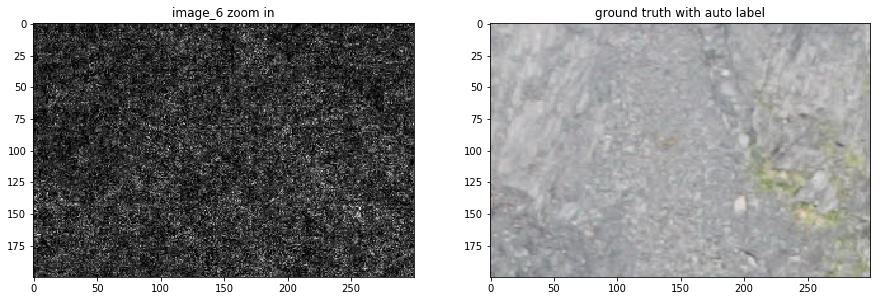

In [14]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
ax[0].imshow(img6zoom,cmap='gray')
ax[1].imshow(img1zoom[:,:,[2,1,0]])
ax[0].title.set_text('image_6 zoom in')
ax[1].title.set_text('ground truth with auto label')


#for blob in blobszoom:
for blob in blobs:
    # get the coordinates for each blob
    y, x, s = blob
    # get the color of the pixel from Train Dotted in the center of the blob
    b,g,R = img1[int(y)][int(x)][:]
    x1 = int((x*r)//width)
    y1 = int((y*r)//width)
    # decision tree to pick the class of the blob by looking at the color in Train Dotted
    if R > 225 and b < 25 and g < 25: # RED
        res[x1,y1,0]+=1
    elif R > 225 and b > 225 and g < 25: # MAGENTA
        res[x1,y1,1]+=1
    elif R < 75 and b < 50 and 150 < g < 200: # GREEN
        res[x1,y1,4]+=1
    elif R < 75 and  150 < b < 200 and g < 75: # BLUE
        res[x1,y1,3]+=1
    elif 60 < R < 120 and b < 50 and g < 75:  # BROWN
        res[x1,y1,2]+=1

    rect = patches.Rectangle((x-6,y-6),10,10,linewidth=1,edgecolor='b',facecolor='none')
    ax[1].add_patch(rect)
    colormap = {'0':'adult males','1':'subadult males','2':'adult females','3':'juveniles','4':'pups'}
    ax[1].text(x+15,y,colormap[str] ,  fontsize=20,color='red')
    
    ax[0].text(x-15,y-10, '(x,y) =(' + str(int(x))+','+str(int(y))+')',  fontsize=10,color='white')

<table border="0" width="600" align="left">
<tbody>
<tr align="center">
<td style="background-color: #000000; color: white;">Black</td>
<td style="background-color: #808000; color: white;">Olive</td>
<td style="background-color: #800080; color: white;">Purple</td>
<td style="background-color: #008080; color: white;">Teal</td>
</tr>
<tr align="center">
<td>rgb(0, 0, 0)</td>
<td>rgb(128, 128, 0)</td>
<td>rgb(128, 0, 128)</td>
<td>rgb(0, 128, 128)</td>
</tr>
<tr align="center">
<td style="background-color: #808080; color: white;">Gray</td>
<td style="background-color: #800000; color: white;">Maroon</td>
<td style="background-color: #008000; color: white;">Green</td>
<td style="background-color: #000080; color: white;">Navy</td>
</tr>
<tr align="center">
<td>rgb(128, 128, 128)</td>
<td>rgb(128, 0, 0)</td>
<td>rgb(0, 128, 0)</td>
<td>rgb(0, 0, 128)</td>
</tr>
<tr align="center">
<td style="background-color: #c0c0c0;">Silver</td>
<td style="background-color: #ffff00;">Yellow</td>
<td style="background-color: #ff00ff; color: white;">Fuchsia</td>
<td style="background-color: #00ffff;">Aqua</td>
</tr>
<tr align="center">
<td>rgb(192, 192, 192)</td>
<td>rgb(255, 255, 0)</td>
<td>rgb(255, 0, 255)</td>
<td>rgb(0, 255, 255)</td>
</tr>
<tr align="center">
<td style="background-color: #ffffff;">White</td>
<td style="background-color: #ff0000; color: white;">Red</td>
<td style="background-color: #00ff00;">Lime</td>
<td style="background-color: #0000ff; color: white;">Blue</td>
</tr>
<tr align="center">
<td>rgb(255, 255, 255)</td>
<td>rgb(255, 0, 0)</td>
<td>rgb(0, 255, 0)</td>
<td>rgb(0, 0, 255)</td>
</tr>
</tbody>
</table>

In [15]:
img = cv2.resize(image_2 * ma, (int(w*r),int(h*r)))
h1,w1,d = img.shape
trainX = []
trainY = []

print(image_2.shape)
print(img.shape)


NameError: name 'ma' is not defined

In [300]:
blobszoom.shape

(3, 3)

In [ ]:
for i in range(int(w1//width)):
    for j in range(int(h1//width)):
        trainY.append(reszoom[i,j,:])
        trainX.append(img[j*width:j*width+width,i*width:i*width+width,:])

(1331, 1996, 3)


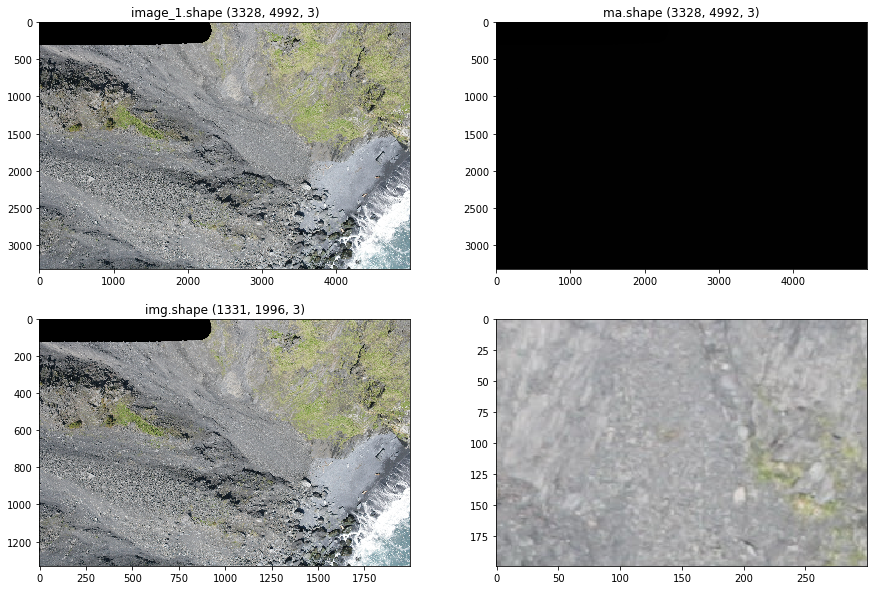

In [16]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
ma  = cv2.cvtColor((1*(np.sum(image_1, axis=2)>20)).astype('uint8'), cv2.COLOR_GRAY2BGR)
img = cv2.resize(image_2 * ma, (int(w*r),int(h*r)))
ax[0][0].imshow(image_1[:,:,[2,1,0]]);ax[0][0].title.set_text('image_1.shape ' + str(image_1.shape))
ax[0][1].imshow(ma); ax[0][1].title.set_text('ma.shape ' + str(ma.shape))
ax[1][0].imshow(img[:,:,[2,1,0]]); ax[1][0].title.set_text('img.shape ' + str(img.shape))
ax[1][1].imshow(img1zoom[:,:,[2,1,0]])

print(img.shape)

In [ ]:
print(np.random.seed(1004))

In [ ]:
randomize = np.arange(len(trainX))

In [ ]:
trainX, trainY = GetData("0.jpg")

np.random.seed(1004)
randomize = np.arange(len(trainX))
np.random.shuffle(randomize)
trainX = trainX[randomize]
trainY = trainY[randomize]

n_train = int(len(trainX) * 0.7)
testX = trainX[n_train:]
testY = trainY[n_train:]
trainX = trainX[:n_train]
trainY = trainY[:n_train]

print(trainY.shape, trainY[0])
print(testY.shape, testY[0])